# Megaline

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El propósito del proyecto es determinar cual de las tarifas ofrecidas por la empresa Megaline es más rentable, en función al comportamiento de los clientes considerando pagos mensuales e ingresos adicionales por excedentes. Este análisis permitirá ajustar el presupuesto de publicidad y establecer estratégias de marketing acordes a los resultados obtenidos.

Descripción de las tarifas

Nota: Megaline redondea los segundos a minutos y los megabytes a gigabytes. Para las llamadas, cada llamada individual se redondea: incluso si la llamada duró solo un segundo, se contará como un minuto. Para el tráfico web, las sesiones web individuales no se redondean. En vez de esto, el total del mes se redondea hacia arriba. Si alguien usa 1025 megabytes este mes, se le cobrarán 2 gigabytes.

A continuación puedes ver una descripción de las tarifas:

Surf

Pago mensual: $20.
500 minutos al mes, 50 SMS y 15 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 3 centavos.
1 SMS: 3 centavos.
1 GB de datos: $10.

Ultimate

Pago mensual: $70.
3000 minutos al mes, 1000 SMS y 30 GB de datos.
Si se exceden los límites del paquete:
1 minuto: 1 centavo.
1 SMS: 1 centavo.
1 GB de datos: $7.

Las acciones a realizar son las siguiente:
- Cargar las librerías requeridas.
- Cargar las bases de datos proporcionadas.
- Analizar a fondo las tarifas prepago, identificando los límites de minutos, SMS y datos de cada plan, a fin de conocer la modalidad de cobro de excedentes.
- Evaluar la calidad de los datos de los 500 clientes, identificando y corrigiendo posibles inconsistencias como valores ausentes, duplicados y tipos incorrectos de datos.
- Calcular los ingresos mensuales y excedentes por cliente.
- Comparar los ingresos de la tarifa Surf y Ultimate para determinar cual genera más ingresos fijos y por excedentes.
- Realizar pruebas estadísticas para evaluar si la diferencia de ingresos entre los dos planes es significativa. Determinando si efectivamente una tarifa es más rentable que la otra.
- Finalmente, establecer las conclusiones en base a los calculos y el análisis estadístico realizados, recomendando los ajustes al presupuesto de publicidad y estrategia de marketing.

## Inicialización

In [114]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import math as mt

## Cargar datos

In [115]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')



## Preparar los datos

Este apartado es primordial para garantizar la calidad de la información para su posterioro análisis. En esta fase, se recopilarán y organizarán los datos de las bases con los información de 500 clientes de Megaline, asegurando que no se tenga inconsistencias ni datos faltantes.

## Tarifas

In [116]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [117]:
# Imprime una muestra de los datos para las tarifas
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Inicialmente, los datos no parecen presentar ningún problema y no se presentan valores ausentes. La base muestra la cantidad de mensajes, MB y minutos incluidos mensualmente en cada plan, además de los costos mensuales y los costos por excedentes. Es probable que la columna de MB incluidos en cada plan sea un poco confusa ya que las características de los planes incluyen esta información en GB. Es posible que se requiera incluir una columna para convertir los MB a GB.

## Corregir datos

## Enriquecer los datos

In [118]:
plans['gb_per_month_included'] = (plans['mb_per_month_included']/1024).astype('int')
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Usuarios/as

In [119]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [120]:
# Imprime una muestra de datos para usuarios
print(users.head())


   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


La base de datos de usuarios contiene información de 500 clientes usuarios de los planes de Megaline, incluyendo id, nombre, apellido, edad, ciudad, fecha de registro, plan prepago y fecha en la que el usuario dio de baja el plan. Es evidente que la columna churn_date presenta la mayoría de valores nulos, con solo 34 valores registrados, esto puede deberse a que los usuarios seleccionados no cancelaron su suscripción al plan. Adicionalmente, las columnas de fechas se presentan como object, por lo que se debe considerar cambiar a un formato datetime. 


### Corregir los datos

In [121]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

In [122]:
users['active_time'] = users['churn_date'] - users['reg_date']
print(users[users['active_time'].notna()].head())

    user_id first_name last_name  age  \
6      1006     Jesusa  Bradford   73   
12     1012    Jonelle   Mcbride   59   
22     1022         Bo      Snow   73   
40     1040      Paris    Santos   72   
50     1050       Jone      Owen   23   

                                               city   reg_date      plan  \
6            San Francisco-Oakland-Berkeley, CA MSA 2018-11-27  ultimate   
12           Chicago-Naperville-Elgin, IL-IN-WI MSA 2018-06-28      surf   
22        New York-Newark-Jersey City, NY-NJ-PA MSA 2018-04-20      surf   
40  Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA 2018-12-23      surf   
50    Miami-Fort Lauderdale-West Palm Beach, FL MSA 2018-03-20  ultimate   

   churn_date active_time  
6  2018-12-18     21 days  
12 2018-11-16    141 days  
22 2018-09-07    140 days  
40 2018-12-30      7 days  
50 2018-10-07    201 days  


## Llamadas

In [123]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [124]:
# Imprime una muestra de datos para las llamadas
print(calls.head())


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


La muestra de datos para las llamadas contiene 137735 registros sin valores ausentes. Esta base de datos contiene información relacionada con el id de la llamada en un formato object que es correcto porque contiene valores alfanuméricos, el id de usuario, la duración de la llamada en minutos y la fecha de la llamada. Esta última se presenta como objeto y sería útil convertirla a un formato datetime para posteriores análisis. Por otra parte, ya que las tarifas son mensuales, es necesario crear una columna con el mes de los registros para tener conocimiento de los minutos por mes.

### Corregir los datos

In [148]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [126]:
calls['month'] = calls['call_date'].dt.month

Se observa que existen usuarios con 0 minutos de duración de llamadas lo que indica que no realizan ninguna llamada en el mes y usuarios que llegan a llamadas de 37.6 minutos de duración

## Mensajes

In [78]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [79]:
# Imprime una muestra de datos para los mensajes

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


La base de datos de mensajes contiene las columnas de id de mensaje, id de usuario y fecha de mensaje, no contiene datos nulos, sin embargo, la fecha se presenta como objeto y sería útil cambiarla a un formato datetime para futuros análisis. Al igual que en las llamadas, se requiere crear una columna de mes del mensaje a fin de conocer la cantidad de mensajes por mes.

### Corregir los datos

In [149]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [150]:
messages['month'] = messages['message_date'].dt.month

## Internet

In [82]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [83]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head())


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


La base de datos de internet contiene 104825 registros, cuenta con cuatro columnas correspondientes al id de sesión de internet, id de usuario, fecha de la sesión y los MB usados. Todas las columnas presentan los datos completos. Los formatos de las columnas son correctos, a excepción de la fecha de sesión que se presenta como objeto y se podría cambiar a un formato datetime. Asimismo, es posible crear una nueva columna para obtener el mes de sesión, a fin de conocer el uso de datos mensual. Posteriormente, al agrupar los datos por mes debemos transformar el consumo de mb a gb y hacer un redondeo superior, ya que el consumo extra se cobra como un gb extra.

### Corregir los datos

In [151]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enriquecer los datos

In [152]:
internet['month'] = internet['session_date'].dt.month

## Estudiar las condiciones de las tarifas

In [86]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans.head())


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                     15  
1                     30  


## Agregar datos por usuario



In [87]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls_per_user = calls.groupby(['user_id', 'month'])['id'].count().rename('calls').reset_index()
print(calls_per_user.head(10))
user_plan = users[['user_id', 'city', 'plan']]
calls_per_user = user_plan.merge(calls_per_user, on='user_id', how='right')
calls_per_user.rename(columns={'plan':'plan_name'}, inplace=True)
print(calls_per_user.head())

   user_id  month  calls
0     1000     12     16
1     1001      8     27
2     1001      9     49
3     1001     10     65
4     1001     11     64
5     1001     12     56
6     1002     10     11
7     1002     11     55
8     1002     12     47
9     1003     12    149
   user_id                                   city plan_name  month  calls
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate     12     16
1     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      8     27
2     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      9     49
3     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     10     65
4     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     11     64


In [88]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_user = calls.groupby(['user_id', 'month'])['duration'].sum().rename('call_duration').reset_index()
print(minutes_per_user.head(10))


   user_id  month  call_duration
0     1000     12         116.83
1     1001      8         171.14
2     1001      9         297.69
3     1001     10         374.11
4     1001     11         404.59
5     1001     12         392.93
6     1002     10          54.13
7     1002     11         359.76
8     1002     12         363.24
9     1003     12        1041.00


In [89]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages_per_user = messages.groupby(['user_id', 'month'])['id'].count().rename('messages').reset_index()
print(messages_per_user.head(10))

   user_id  month  messages
0     1000     12        11
1     1001      8        30
2     1001      9        44
3     1001     10        53
4     1001     11        36
5     1001     12        44
6     1002     10        15
7     1002     11        32
8     1002     12        41
9     1003     12        50


In [90]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
print(internet_per_user.head())

   user_id  month   mb_used
0     1000     12   1901.47
1     1001      8   6919.15
2     1001      9  13314.82
3     1001     10  22330.49
4     1001     11  18504.30


In [91]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
usage_per_user = calls_per_user.merge(minutes_per_user, on=['user_id', 'month'], how='outer')
usage_per_user = usage_per_user.merge(messages_per_user, on=['user_id', 'month'], how='outer')
usage_per_user = usage_per_user.merge(internet_per_user, on=['user_id', 'month'], how='outer')

print(usage_per_user.head())


   user_id                                   city plan_name  month  calls  \
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate     12   16.0   
1     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      8   27.0   
2     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      9   49.0   
3     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     10   65.0   
4     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     11   64.0   

   call_duration  messages   mb_used  
0         116.83      11.0   1901.47  
1         171.14      30.0   6919.15  
2         297.69      44.0  13314.82  
3         374.11      53.0  22330.49  
4         404.59      36.0  18504.30  


In [92]:
# Añade la información de la tarifa
total_usage_per_user = usage_per_user.merge(plans, on='plan_name', how='left')
print(total_usage_per_user.head())

   user_id                                   city plan_name  month  calls  \
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate     12   16.0   
1     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      8   27.0   
2     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      9   49.0   
3     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     10   65.0   
4     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     11   64.0   

   call_duration  messages   mb_used  messages_included  \
0         116.83      11.0   1901.47             1000.0   
1         171.14      30.0   6919.15               50.0   
2         297.69      44.0  13314.82               50.0   
3         374.11      53.0  22330.49               50.0   
4         404.59      36.0  18504.30               50.0   

   mb_per_month_included  minutes_included  usd_monthly_pay  usd_per_gb  \
0                30720.0            3000.0             70.0         7.0   
1                15360.0        

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [130]:
# Calcula el ingreso mensual para cada usuario
total_usage_per_user['extra_minutes'] = (np.ceil(total_usage_per_user['call_duration']) - total_usage_per_user['minutes_included']).clip(lower=0)
total_usage_per_user['extra_messages'] = (total_usage_per_user['messages'] - total_usage_per_user['messages_included']).clip(lower=0)
total_usage_per_user['extra_mb'] = (total_usage_per_user['mb_used'] - total_usage_per_user['mb_per_month_included']).clip(lower=0)
total_usage_per_user['extra_gb'] = np.ceil(total_usage_per_user['extra_mb']/1024)
total_usage_per_user['extra_income'] = (total_usage_per_user['extra_minutes'] * total_usage_per_user['usd_per_minute']) + (total_usage_per_user['extra_messages'] * total_usage_per_user['usd_per_message']) + (total_usage_per_user['extra_gb'] * total_usage_per_user['usd_per_gb'])
total_usage_per_user['total_income'] = (total_usage_per_user['usd_monthly_pay'] + total_usage_per_user['extra_income'])
print(total_usage_per_user.head())

   user_id                                   city plan_name  month  calls  \
0     1000  Atlanta-Sandy Springs-Roswell, GA MSA  ultimate     12   16.0   
1     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      8   27.0   
2     1001        Seattle-Tacoma-Bellevue, WA MSA      surf      9   49.0   
3     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     10   65.0   
4     1001        Seattle-Tacoma-Bellevue, WA MSA      surf     11   64.0   

   call_duration  messages   mb_used  messages_included  \
0         116.83      11.0   1901.47             1000.0   
1         171.14      30.0   6919.15               50.0   
2         297.69      44.0  13314.82               50.0   
3         374.11      53.0  22330.49               50.0   
4         404.59      36.0  18504.30               50.0   

   mb_per_month_included  ...  usd_per_gb  usd_per_message  usd_per_minute  \
0                30720.0  ...         7.0             0.01            0.01   
1                15360.0  

## Estudia el comportamiento de usuario

### Llamadas

  plan_name  month  call_duration
0      surf      1     192.840000
1      surf      2     280.851111
2      surf      3     310.970000
3      surf      4     332.380000
4      surf      5     387.108000
plan_name        surf    ultimate
month                            
1          192.840000  183.162500
2          280.851111  443.171667
3          310.970000  285.701667
4          332.380000  316.508095
5          387.108000  383.664828


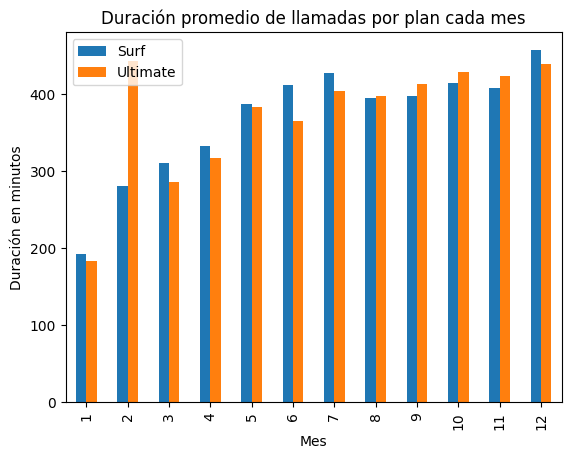

In [131]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
avg_call_duration = total_usage_per_user.groupby(['plan_name', 'month'])['call_duration'].mean().reset_index()
print(avg_call_duration.head())
avg_pivot_calls = avg_call_duration.pivot(index='month', columns='plan_name', values='call_duration')
print(avg_pivot_calls.head())
avg_pivot_calls.plot(kind='bar', 
                       title = 'Duración promedio de llamadas por plan cada mes',
                       xlabel = 'Mes',
                       ylabel = 'Duración en minutos'
                      )
plt.legend(['Surf', 'Ultimate'])
plt.show()

  plan_name  month  call_duration
0      surf      1         385.68
1      surf      2        2527.66
2      surf      3        7152.31
3      surf      4       16619.00
4      surf      5       29033.10
plan_name       surf  ultimate
month                         
1             385.68    732.65
2            2527.66   2659.03
3            7152.31   3428.42
4           16619.00   6646.67
5           29033.10  11126.28
6           39499.26  16441.12
7           51367.31  23822.27
8           62721.48  28206.51
9           75852.46  35542.71
10          96149.09  45067.81
11         113086.75  53400.65
12         142297.14  65384.90


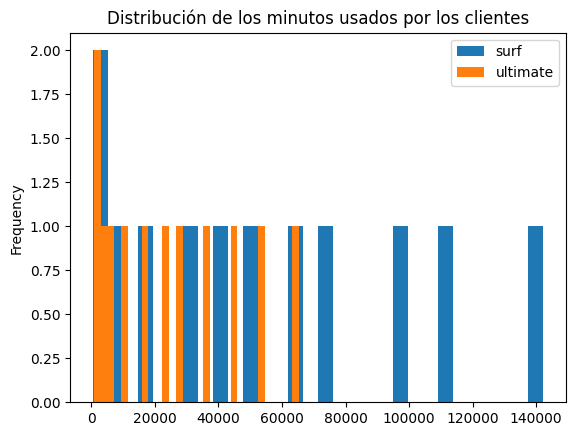

In [132]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
minutes_per_month = total_usage_per_user.groupby(['plan_name', 'month'])['call_duration'].sum().reset_index()
print(minutes_per_month.head())

pivot_minutes = minutes_per_month.pivot(index='month', columns='plan_name', values='call_duration')
print(pivot_minutes)

pivot_minutes['surf'].plot(kind='hist', bins=30)
pivot_minutes['ultimate'].plot(kind='hist', bins=30)
plt.legend(['surf', 'ultimate'])
plt.title('Distribución de los minutos usados por los clientes')
plt.show()

In [133]:
# Calcula la media y la varianza de la duración mensual de llamadas.
calls_mean_std = total_usage_per_user.groupby(['plan_name'])['call_duration'].agg(['mean', 'std']).reset_index()
print(calls_mean_std)

  plan_name        mean         std
0      surf  412.097890  216.797727
1  ultimate  410.180954  224.745705


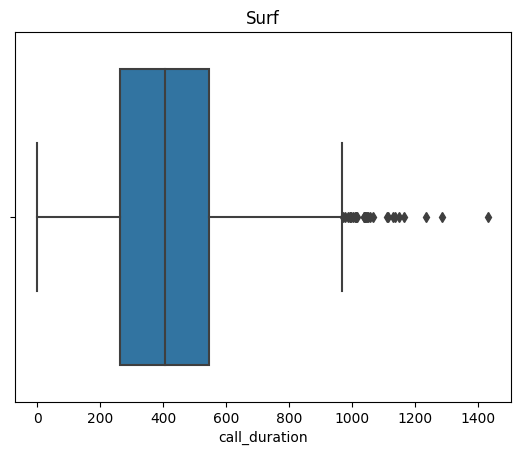

Text(0.5, 1.0, 'Ultimate')

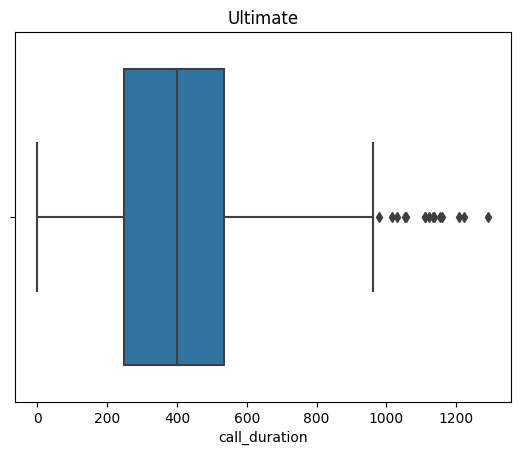

In [134]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
calls_duration_surf = total_usage_per_user[total_usage_per_user['plan_name']=='surf']['call_duration'].reset_index()
sns.boxplot(calls_duration_surf['call_duration'])
plt.title('Surf')
plt.show()

calls_duration_surf = total_usage_per_user[total_usage_per_user['plan_name']=='ultimate']['call_duration'].reset_index()
sns.boxplot(calls_duration_surf['call_duration'])
plt.title('Ultimate')

Se pudo observar que en promedio las llamadas de los usuarios de ambos planes tienen una duración similar con 412 minutos para Surf y 410 minutos para Ultimate. Por otra parte, la desviación estandar es relativamente mayor en el plan Ultimate, sugiriendo que sus usuarios tienen mayor dispersión en sus llamadas. 

Con los diagramas de caja se observa que ambos planes tienen una mediana similar, indicando que la duración típica en usuarios de ambos planes no tiene una variación significativa. Ambos planes tienen un rango parecido, con la mayoría de sus usuarios con un uso entre 200 y 600 minutos. Con el intérvalo intercuartílico se observa que el comportamiento de los usuarios es similar en ambos planes, en relación a las llamadas. Se identifican valores atípicos en ambos planes, superiores a 1000 minutos. Los valores atípicos del plan Ultimate pueden explicarse por las mejores condiciones en llamadas con mayor cantidad de minutos disponibles, sin embargo, se debe analizar si es conveniente la oferta de minutos del plan ya que la mayoría de sus usuarios se encuentran en otro rango.


### Mensajes

  plan_name  month   messages
0      surf      1  21.000000
1      surf      2  21.600000
2      surf      3  21.937500
3      surf      4  24.166667
4      surf      5  33.870370
plan_name       surf   ultimate
month                          
1          21.000000  20.666667
2          21.600000  27.800000
3          21.937500  34.714286
4          24.166667  28.937500
5          33.870370  44.333333


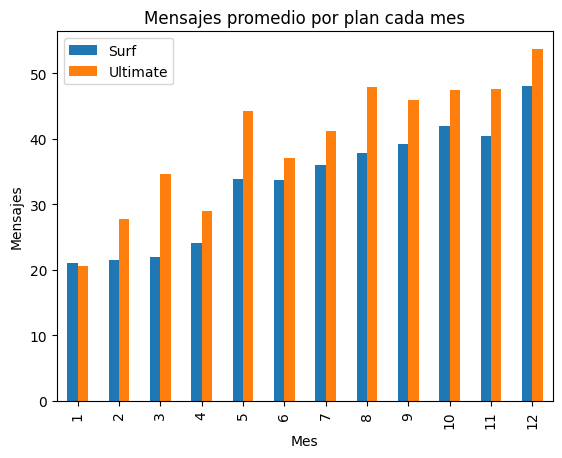

  plan_name  month  messages
0      surf      1      21.0
1      surf      2     108.0
2      surf      3     351.0
3      surf      4     870.0
4      surf      5    1829.0
plan_name    surf  ultimate
month                      
1            21.0      62.0
2           108.0     139.0
3           351.0     243.0
4           870.0     463.0
5          1829.0     931.0


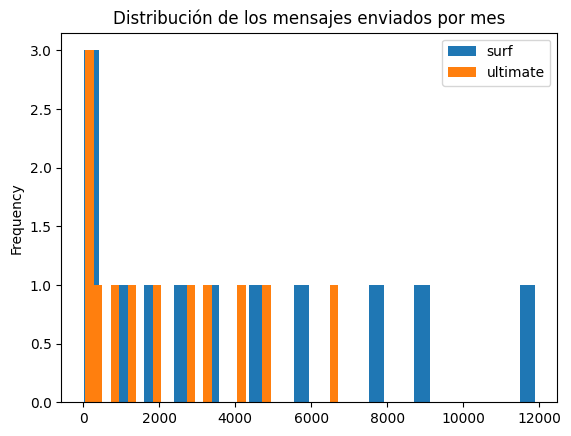

  plan_name       mean        std
0      surf  39.980737  33.189423
1  ultimate  46.455959  32.930135


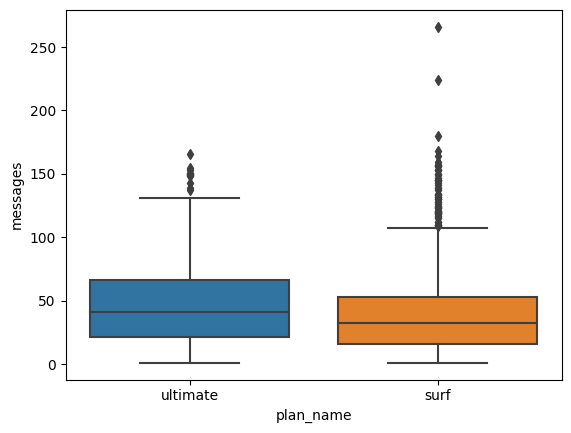

In [135]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
avg_messages = total_usage_per_user.groupby(['plan_name', 'month'])['messages'].mean().reset_index()
print(avg_messages.head())
avg_pivot_messages = avg_messages.pivot(index='month', columns='plan_name', values='messages')
print(avg_pivot_messages.head())
avg_pivot_messages.plot(kind='bar', 
                       title = 'Mensajes promedio por plan cada mes',
                       xlabel = 'Mes',
                       ylabel = 'Mensajes'
                      )
plt.legend(['Surf', 'Ultimate'])
plt.show()

messages_per_month = total_usage_per_user.groupby(['plan_name', 'month'])['messages'].sum().reset_index()
print(messages_per_month.head())

pivot_messages = messages_per_month.pivot(index='month', columns='plan_name', values='messages')
print(pivot_messages.head())

pivot_messages['surf'].plot(kind='hist', bins=30)
pivot_messages['ultimate'].plot(kind='hist', bins=30)
plt.legend(['surf', 'ultimate'])
plt.title('Distribución de los mensajes enviados por mes')
plt.show()

messages_mean_std = total_usage_per_user.groupby(['plan_name'])['messages'].agg(['mean', 'std']).reset_index()
print(messages_mean_std)

sns.boxplot(x='plan_name', y='messages', data= total_usage_per_user)
plt.show()

Se observa que los usuarios del plan Ultimate envían en promedio 46 mensajes por mes, mientras que los usuarios de Surf envían en promedio 39 mensajes. La desviación estandar es similar en ambos planes. El IQR en ambis planes es similar comprobando que el comportamiento de la mayoría de los usuarios es parecido en relación a los mensajes. Se observa también que la mediana en Ultimate es mayor, confirmando que los usuarios de este plan envían más mensajes en promedio. Se identificó mayor cantidad de valores atípicos en el plan Surf, indicando que este plan genera más ingresos en cobros excedentes de mensajes. Sin embargo, en general el comportamiento de los usuarios es similar.

### Internet

  plan_name  month       mb_used
0      surf      1   4874.860000
1      surf      2  12178.843333
2      surf      3  13345.440000
3      surf      4  12228.778571
4      surf      5  14393.399054
plan_name          surf      ultimate
month                                
1           4874.860000   6918.092500
2          12178.843333  17884.958333
3          13345.440000  18321.518333
4          12228.778571  16121.654762
5          14393.399054  16624.482414


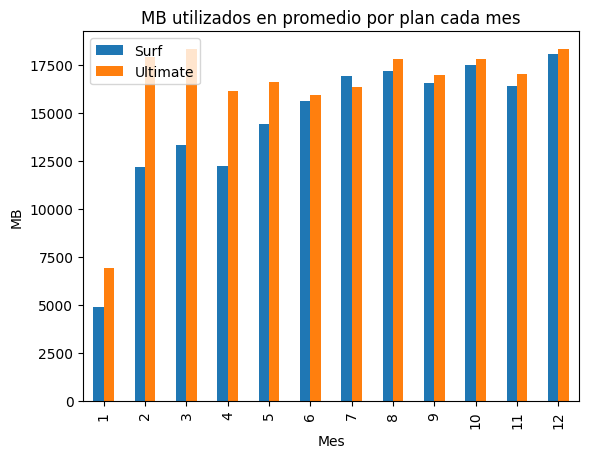

In [136]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
avg_mb = total_usage_per_user.groupby(['plan_name', 'month'])['mb_used'].mean().reset_index()
print(avg_mb.head())
avg_pivot_mb = avg_mb.pivot(index='month', columns='plan_name', values='mb_used')
print(avg_pivot_mb.head())
avg_pivot_mb.plot(kind='bar', 
                       title = 'MB utilizados en promedio por plan cada mes',
                       xlabel = 'Mes',
                       ylabel = 'MB'
                      )
plt.legend(['Surf', 'Ultimate'])
plt.show()


  plan_name  month     mb_used
0      surf      1     9749.72
1      surf      2   109609.59
2      surf      3   306945.12
3      surf      4   599210.15
4      surf      5  1065111.53
plan_name        surf   ultimate
month                           
1             9749.72   27672.37
2           109609.59  107309.75
3           306945.12  219858.22
4           599210.15  338554.75
5          1065111.53  482109.99


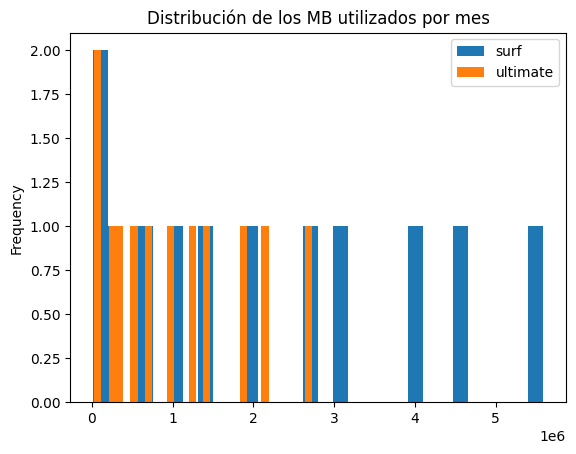

In [137]:
mb_per_month = total_usage_per_user.groupby(['plan_name', 'month'])['mb_used'].sum().reset_index()
print(mb_per_month.head())

pivot_mb = mb_per_month.pivot(index='month', columns='plan_name', values='mb_used')
print(pivot_mb.head())

pivot_mb['surf'].plot(kind='hist', bins=30)
pivot_mb['ultimate'].plot(kind='hist', bins=30)
plt.legend(['surf', 'ultimate'])
plt.title('Distribución de los MB utilizados por mes')
plt.show()

  plan_name          mean          std
0      surf  16667.548229  7713.202954
1  ultimate  17278.003731  7759.655167


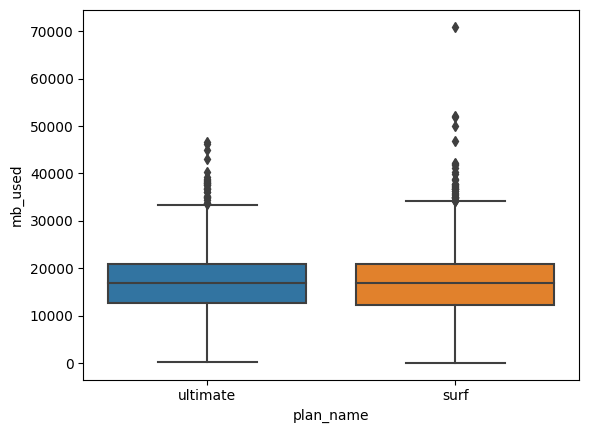

In [138]:
mb_mean_std = total_usage_per_user.groupby(['plan_name'])['mb_used'].agg(['mean', 'std']).reset_index()
print(mb_mean_std)

sns.boxplot(x='plan_name', y='mb_used', data= total_usage_per_user)
plt.show()

Se observa que en promedio el consumo de MB es relativamente mayor en el plan Ultimate, sin embargo, las variabilidad en ambos planes es casi la misma. También se observa que el rango, la mediana y los intervalos intercuartílicos son similares en ambos planes, identificando que no existe una diferencia significativa entre planes. Por otro lado, se observan más valores atípicos en el plan Surf, lo que indica que pueden tener más ingresos por cobros excedentes.

De igual manera se evidencia el consumo creciente de datos en el plan Surf, que obliga a analizar la estructura de costos del plan y la estrategia comercial.

## Ingreso

  plan_name  month  total_income
0      surf      1     20.000000
1      surf      2     23.668000
2      surf      3     38.326875
3      surf      4     40.267429
4      surf      5     50.370943
plan_name       surf  ultimate
month                         
1          20.000000   70.0000
2          23.668000   70.0000
3          38.326875   78.0000
4          40.267429   73.0625
5          50.370943   71.0000


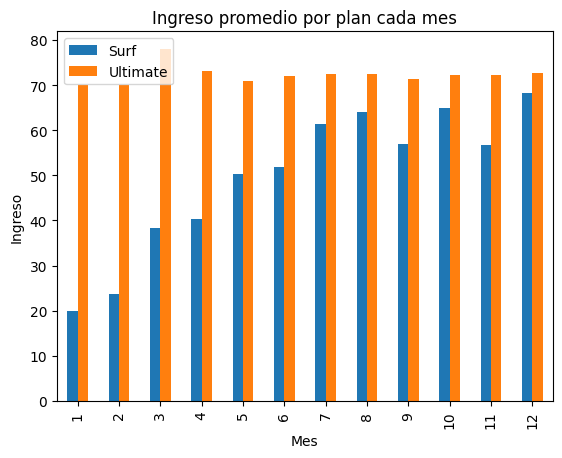

In [139]:
avg_income = total_usage_per_user.groupby(['plan_name', 'month'])['total_income'].mean().reset_index()
print(avg_income.head())
avg_pivot_income = avg_income.pivot(index='month', columns='plan_name', values='total_income')
print(avg_pivot_income.head())
avg_pivot_income.plot(kind='bar', 
                       title = 'Ingreso promedio por plan cada mes',
                       xlabel = 'Mes',
                       ylabel = 'Ingreso'
                      )
plt.legend(['Surf', 'Ultimate'])
plt.show()


  plan_name  month  total_income
0      surf      1         20.00
1      surf      2        118.34
2      surf      3        613.23
3      surf      4       1409.36
4      surf      5       2669.66
plan_name     surf  ultimate
month                       
1            20.00     210.0
2           118.34     350.0
3           613.23     546.0
4          1409.36    1169.0
5          2669.66    1491.0


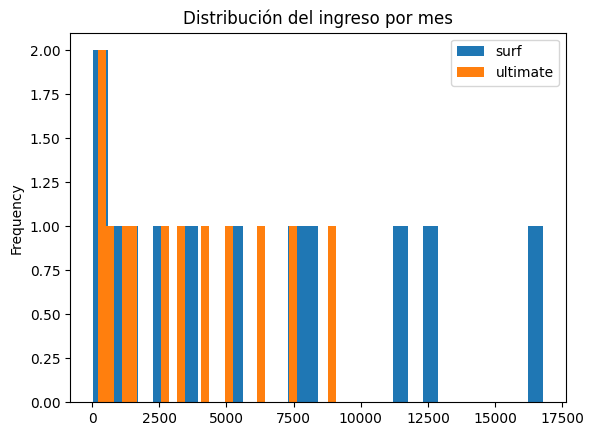

In [140]:
income_per_month = total_usage_per_user.groupby(['plan_name', 'month'])['total_income'].sum().reset_index()
print(income_per_month.head())

pivot_income = income_per_month.pivot(index='month', columns='plan_name', values='total_income')
print(pivot_income.head())

pivot_income['surf'].plot(kind='hist', bins=30)
pivot_income['ultimate'].plot(kind='hist', bins=30)
plt.legend(['surf', 'ultimate'])
plt.title('Distribución del ingreso por mes')
plt.show()

  plan_name       mean        std
0      surf  60.014602  53.441058
1  ultimate  72.248705  11.034406


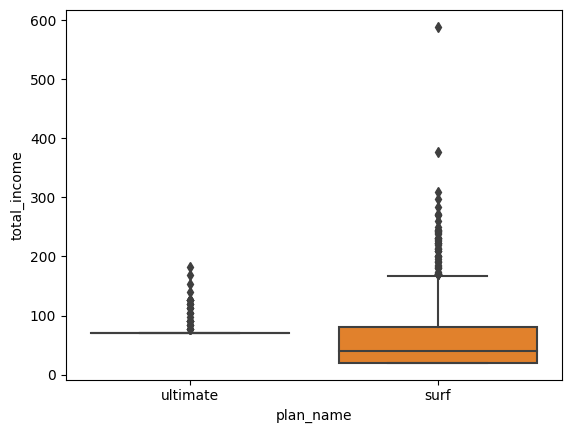

In [141]:
income_mean_std = total_usage_per_user.groupby(['plan_name'])['total_income'].agg(['mean', 'std']).reset_index()
print(income_mean_std)

sns.boxplot(x='plan_name', y='total_income', data= total_usage_per_user)
plt.show()

Es evidente que el ingreso promedio del plan Surf tiene un crecimiento exponencial en los últimos meses del año. Si bien el ingreso promedio del plan Ultimate es mayor, la varianza del plan Surf es significativamente mayor, haciendo más volátiles los ingresos. Esto se comprueba con el gráfico de caja donde se ven muchos valores atípicos. Por otra parte, se observa la poca volatilidad en los ingresos percibidos en el plan Ultimate al ver que no presenta un rango o caja en el gráfico.

## Prueba las hipótesis estadísticas

In [145]:
# Prueba las hipótesis
Ho = 'Los ingresos promedio de los usuarios de los planes Ultimate y Surf son iguales'
H1 = 'Los ingresos promedio de los usuarios de los planes Ultimate y Surf son diferentes'
alpha = 0.05

surf_income = total_usage_per_user[total_usage_per_user['plan_name']=='surf']['total_income'].dropna()
ultimate_income = total_usage_per_user[total_usage_per_user['plan_name']=='ultimate']['total_income'].dropna()

levene = st.levene(surf_income, ultimate_income)
print('valor p levene:', levene.pvalue)

if levene.pvalue < alpha:
    print("Se rechaza la hipótesis nula: las varianzas no son iguales (heterocedasticidad).")
else:
    print("No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).")

results = st.ttest_ind(surf_income, ultimate_income, equal_var=False)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')


valor p levene: 2.5914843897925543e-69
Se rechaza la hipótesis nula: las varianzas no son iguales (heterocedasticidad).
valor p: 8.319558977074422e-14
Rechazamos la hipotesis nula


In [147]:
# Prueba las hipótesis
Ho = 'El ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones'
H1 = 'El ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones'
alpha = 0.05

print(total_usage_per_user['city'].unique())


NYNJ_income = total_usage_per_user[total_usage_per_user['city']=='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income'].dropna()
others_income = total_usage_per_user[total_usage_per_user['city']!='New York-Newark-Jersey City, NY-NJ-PA MSA']['total_income'].dropna()

print(np.var(NYNJ_income), np.var(others_income))

levene_ny = st.levene(NYNJ_income, others_income)
print('valor p levene:', levene_ny.pvalue)

if levene_ny.pvalue < alpha:
    print("Se rechaza la hipótesis nula: las varianzas no son iguales (heterocedasticidad).")
else:
    print("No se rechaza la hipótesis nula: las varianzas son iguales (homocedasticidad).")

results = st.ttest_ind(NYNJ_income, others_income, equal_var=True)
print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

## Conclusión general

- A pesar de no existir diferencias significativas en la duración promedio de las llamadas, los mensajes promedio enviados ni en los datos consumidos mensualmente en ambos planes, se observó a partir de una prueba de t de diferencia de medias que si existe diferencia en el ingreso medio de las tarifas. 
- Se identificó que en promedio la tarifa Ultimate genera más ingresos, sin embargo la volatilidad del plan Surf puede generar mayores ingresos por el comportamiento de algunos usuarios que tienen consumos excedentes.
- Se recomienda analizar la oferta de minutos en el plan Ultimate, ya que la mayoría de sus usuarios tiene un consumo menor al ofertado, y los usuarios con consumo atípico podrían generar ingresos excedentes en caso de cambiar la oferta.
- Se debe analizar la estrategia comercial de la tarifa Surf en consumo de datos (MB) ya que se evidencia un incremento en el consumo en los ultimos meses del año.
- Se recomienda ajustar la estrategia comercial y de publicidad enfocandose en los clientes con comportamiento atípico que genera mayores ingresos, ya se adentro de las tarifas actuales o crear un nuevo plan de oferta.